In [1]:
!pip install --upgrade git+https://github.com/science64/DynaTMT-py-SB.git
#!pip install --upgrade git+https://github.com/science64/PBLMM.git

  Cloning https://github.com/science64/DynaTMT-py-SB.git to c:\users\predator\appdata\local\temp\pip-req-build-5pv2i2a3
  Resolved https://github.com/science64/DynaTMT-py-SB.git to commit 8d6ef996ec682aa069915f638e6677bb0a861be0
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/science64/DynaTMT-py-SB.git 'C:\Users\Predator\AppData\Local\Temp\pip-req-build-5pv2i2a3'


In [1]:
# if you run this and get any errors, it might mean that packages are not installed command out pip install and install all the packeges.

# !pip install --upgrade mssuite
# !pip install pandas
# !pip install numpy
# !pip install numpy
# !pip install matplotlib
# !pip install statsmodels
# !pip install scipy
# !pip install --upgrade git+https://github.com/science64/DynaTMT-py-SB.git # This is my repository (Süleyman) that I am updating!
import os
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import warnings
from statsmodels.stats.multitest import multipletests, local_fdr
from scipy.stats import zscore, uniform
import matplotlib.pyplot as plt
import DynaTMT_SB as DynaTMT
import PBLMM as statisticsGetter
# import DynaTMT_SB.DynaTMT as mePROD
#import mssuite.mssuite as ms

warnings.filterwarnings("ignore")

In [4]:
wd = "Example data" # you can define your folder here etc: C://Users/Jasmin/Desktop/JS55/fractionation/
dataName = "20200724_SB_CCCP+ISRIB_Import_PSMs.txt"

psms = pd.read_csv(f'{wd}/{dataName}', sep='\t', header=0) # TEXT or CSV file: you provide your .txt PSM or peptide file here.

# we are removing booster channel which is 131C
psms = psms.drop('Abundance: 131C', axis=1) #booster test we do not drop it

process = DynaTMT.PD_input(psms)
filtered_peptides = process.filter_peptides(psms)
ITadjusted_peptides = process.IT_adjustment(filtered_peptides)
normFinal = process.total_intensity_normalisation(filtered_peptides)
heavy = process.extract_heavy(normFinal)
peptide_data = process.baseline_correction(heavy, threshold=5, i_baseline=0, random=True)

# protein_notIT = process.protein_rollup(peptide_data, method='sum')

protein_IT = process.protein_rollup(peptide_data, method='sum')

Calling function: filter_peptides
Filtering done!
Calling function: IT_adjustment
IT adjustment done!
Calling function: total_intensity_normalisation
Total intensity normalisation done!
Calling function: extract_heavy
Extraction Done Extracted Heavy Peptides: 72814
Calling function: baseline_correction
Calling function: protein_rollup
Protein rollup done!


In [5]:
protein_IT.head()

,Abundance: 126,Abundance: 127N,Abundance: 127C,Abundance: 128N,Abundance: 128C,Abundance: 129N,Abundance: 129C,Abundance: 130N,Abundance: 130C,Abundance: 131N
A0A0B4J2D5,0.0,1612.570392,1504.026725,1234.231758,337.554208,138.419303,185.955231,210.873067,755.991931,786.774396
A0A0B4J2F0,0.0,217.427767,267.166449,209.916804,12.014625,16.267911,30.075142,302.443439,127.902139,121.962675
A0A2R8Y4L2,0.0,83.984109,133.450456,126.507615,94.985561,82.012007,76.342532,92.519328,370.388501,119.421878
A0A3B3IU46,0.0,167.315716,273.269964,328.653367,181.071460,134.586848,118.636395,134.330424,81.163096,262.275208
A0AVT1,0.0,185.956236,317.153508,223.128111,186.062408,76.009377,37.776538,200.873353,10.276148,158.288890


In [6]:
protein_notIT.head()

,Abundance: 126,Abundance: 127N,Abundance: 127C,Abundance: 128N,Abundance: 128C,Abundance: 129N,Abundance: 129C,Abundance: 130N,Abundance: 130C,Abundance: 131N
A0A0B4J2D5,0.0,22.456168,25.956748,16.332405,0.365667,0.722981,0.106819,0.855960,6.609678,11.056261
A0A0B4J2F0,0.0,17.196042,21.715915,17.040165,1.880072,2.316024,2.465445,24.988721,10.959843,10.403016
A0A3B3IU46,0.0,7.439331,12.589269,15.269706,9.127541,6.916210,5.616957,6.154306,3.918959,12.544890
A0FGR8,0.0,365.864073,382.525050,362.468626,206.738263,206.849832,218.402046,300.124348,266.545427,310.068221
A0MZ66,0.0,15.886702,14.310229,13.710067,3.541167,17.312172,14.319576,20.022578,15.855600,15.795413


In [ ]:
conditions = ['Light', 'DMSO', 'DMSO', 'DMSO', 'CCCP', 'CCCP', 'CCCP', 'CCCP_ISRIB', 'CCCP_ISRIB', 'CCCP_ISRIB']
pairs = [['CCCP', 'DMSO'], ['CCCP_ISRIB', 'DMSO'], ['CCCP_ISRIB', 'CCCP']]

resultFinal = peptide_based_lmm(peptide_data, conditions, pairs=pairs)

resultFinal.reset_index(inplace=True)
resultFinal.rename(columns={'index': 'Accession'}, inplace=True)
resultFinal.to_excel('Result_LMM_2023_peptides_multiproessing.xlsx', index=False, engine="openpyxl")

In [7]:
%%time
conditions = ['Light', 'DMSO', 'DMSO', 'DMSO', 'CCCP', 'CCCP', 'CCCP', 'CCCP_ISRIB', 'CCCP_ISRIB', 'CCCP_ISRIB']
pairs = [['CCCP', 'DMSO'], ['CCCP_ISRIB', 'DMSO'], ['CCCP_ISRIB', 'CCCP']]
hypo = statisticsGetter.HypothesisTesting()
resultFinal = hypo.peptide_based_lmm(peptide_data,conditions=conditions,pairs=pairs)
resultFinal.reset_index(inplace=True)
resultFinal.rename(columns={'index': 'Accession'}, inplace=True)
resultFinal.to_excel('Result_LMM_2023_peptides_Notmultiproessing.xlsx', index=False, engine="openpyxl")

# No Normalization applied
# Calculate Protein quantifications from PSM
# Combination done
# Total Number of Datapoints:  321970
# ['CCCP', 'DMSO'] and decision: -1
# ['CCCP_ISRIB', 'DMSO'] and decision: -1
# ['CCCP_ISRIB', 'CCCP'] and decision: 1
# CPU times: total: 22min 4s
# Wall time: 22min 23s

No Normalization applied
Calculate Protein quantifications from PSM
Combination done
Total Number of Datapoints:  321970
['CCCP', 'DMSO'] and decision: -1
['CCCP_ISRIB', 'DMSO'] and decision: -1
['CCCP_ISRIB', 'CCCP'] and decision: 1
CPU times: total: 22min 4s
Wall time: 22min 23s


In [3]:
%%time
from pathos.multiprocessing import ProcessingPool as Pool
import numpy as np

# def process_chunk(chunk):
#     import PBLMM as statisticsGetter
#     conditions = ['Light', 'DMSO', 'DMSO', 'DMSO', 'CCCP', 'CCCP', 'CCCP', 'CCCP_ISRIB', 'CCCP_ISRIB', 'CCCP_ISRIB']
#     pairs = [['CCCP', 'DMSO'], ['CCCP_ISRIB', 'DMSO'], ['CCCP_ISRIB', 'CCCP']]
#     result = statisticsGetter.HypothesisTesting().peptide_based_lmm(chunk, conditions, pairs=pairs)
#     return result

# def parallelize_dataframe(df, func):
#     num_cores = 12
    
#     # Split the dataframe into chunks
#     indices = np.array_split(df.index, num_cores)
#     df_split = [df.loc[idx] for idx in indices]
    
#     # Use multiprocessing to process each chunk
#     pool = Pool(num_cores)
#     results = pool.map(func, df_split)
#     pool.close()
#     pool.join()
    
#     # Rebuild the dataframe from the results
#     concatenated = pd.concat(results, axis=0)
    
#     return concatenated

def process_chunk(chunk, conditions, pairs):
    import PBLMM as statisticsGetter
    result = statisticsGetter.HypothesisTesting().peptide_based_lmm(chunk, conditions, pairs=pairs)
    return result

def parallelize_dataframe(df, func, conditions, pairs):
    num_cores = 12
    df_split = np.array_split(df, num_cores)
    
    # Use a lambda function to pass the additional arguments to process_chunk
    func_with_args = lambda chunk: func(chunk, conditions, pairs)
    
    pool = Pool(num_cores)
    results = pool.map(func_with_args, df_split)
    pool.close()
    pool.join()

    # Rebuild the dataframe from the results
    concatenated = pd.concat(results, axis=0)
    
    return concatenated


conditions = ['Light', 'DMSO', 'DMSO', 'DMSO', 'CCCP', 'CCCP', 'CCCP', 'CCCP_ISRIB', 'CCCP_ISRIB', 'CCCP_ISRIB']
pairs = [['CCCP', 'DMSO'], ['CCCP_ISRIB', 'DMSO'], ['CCCP_ISRIB', 'CCCP']]

# Apply the function in parallel
resultFinal = parallelize_dataframe(peptide_data, process_chunk, conditions, pairs)
resultFinal.reset_index(inplace=True)
resultFinal.rename(columns={'index': 'Accession'}, inplace=True)
resultFinal.to_excel('Result_LMM_2023_peptides_multiproessing_291123_noIT.xlsx', index=False, engine="openpyxl")

# 8 CPU core CPU times: total: 2.27 s
# Wall time: 5min 49s

# 12 CPU core 
# CPU times: total: 2.75 s
# Wall time: 4min 24s

CPU times: total: 2.3 s
Wall time: 2min 52s


In [4]:
peptide_data


,Abundance: 126,Abundance: 127N,Abundance: 127C,Abundance: 128N,Abundance: 128C,Abundance: 129N,Abundance: 129C,Abundance: 130N,Abundance: 130C,Abundance: 131N,Modifications,Master Protein Accessions,Annotated Sequence
3,0.0,0.469679,0.570943,0.447757,0.771353,97.325130,0.004351,84.485770,203.715347,67.462143,N-Term(TMT6plex); K7(TMTK8); C12(Carbamidometh...,A0A0B4J2D5,[K].eFHQAGkPIGLccIAPVLAAk.[V]
6,0.0,82.331921,83.569517,92.591887,0.673479,20.905345,8.525569,6.860635,0.494582,21.286738,N-Term(TMT6plex); K10(TMTK8),A0A0B4J2D5,[K].eVVEAHVDQk.[N]
8,0.0,1089.196842,864.608138,914.319616,0.118878,0.801889,15.537600,56.423256,0.306074,0.754970,N-Term(TMT6plex); R9(Label:13C(6)15N(4)),A0A0B4J2D5,[K].gQPSEGESr.[N]
10,0.0,870.669219,1066.910842,686.463808,0.108992,0.814374,24.792282,27.576679,390.143461,459.225038,N-Term(TMT6plex); K25(TMTK8),A0A0B4J2D5,[K].iTDLANLSAANHDAAIFPGGFGAAk.[N]
12,0.0,1016.186201,1048.923848,1292.642886,209.770983,60.669897,218.615174,243.523833,0.222316,0.239222,N-Term(TMT6plex); K10(TMTK8),A0A0B4J2D5,[K].nLSTFAVDGk.[D]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88861,0.0,500.799191,140.644667,397.505390,353.787892,376.913066,11.648282,406.138282,233.628913,427.606537,N-Term(TMT6plex); R8(Label:13C(6)15N(4)),Q9Y6N7,[R].qMQDAAGr.[R]
88870,0.0,215.799503,235.887815,167.499015,170.399066,127.367015,88.318561,247.672067,340.147638,246.312241,N-Term(TMT6plex); K8(TMTK8),Q9Y6V7,[R].sSNTFSIk.[K]
88873,0.0,123.578024,122.313428,109.830719,56.576159,0.489332,0.152395,170.622950,94.298568,172.953438,N-Term(TMT6plex); R9(Label:13C(6)15N(4)),Q9Y6W3,[K].tGPLLIELr.[G]
88879,0.0,53.734989,0.598114,33.001887,69.329962,38.644648,3.719956,53.135973,107.602997,98.364371,N-Term(TMT6plex); R12(Label:13C(6)15N(4)),Q9Y6W5,[K].eEEVSLQGINTr.[K]


In [9]:
data = pd.read_excel('Result_LMM_2023_peptides_multiproessing_291123.xlsx')
data_noIT = pd.read_excel('Result_LMM_2023_peptides_multiproessing_291123_noIT.xlsx') 

[-12.98046103417015, 5.335589205292792] [-12.98046103417015, 5.335589205292792]
[[1.         0.00107304]
 [0.00107304 1.        ]]
0.001073043892135581 1.1514231944494763e-06


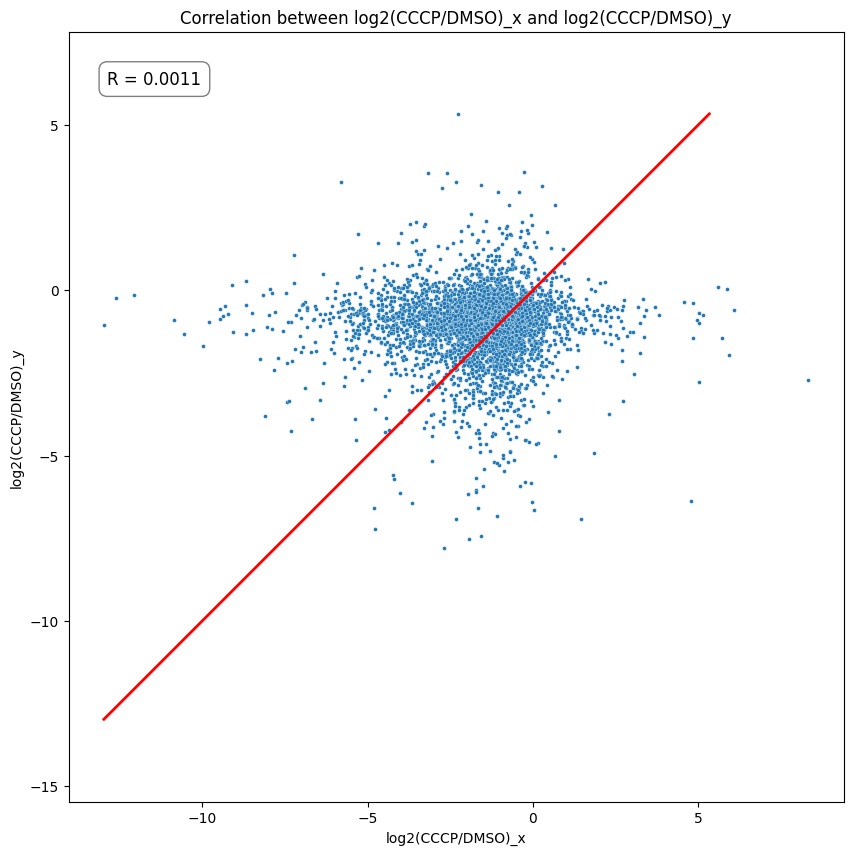

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Merge the datasets on the 'Accession' column using an outer join
colname_x = 'log2(CCCP/DMSO)'
colname_y = 'log2(CCCP/DMSO)'

if colname_x == colname_y:
    colname_x = str(colname_x)+'_x'
    colname_y = str(colname_y)+'_y'

# Perform the merge
merged_data_foldchange = pd.merge(data, 
                                  data_noIT, 
                                  left_index=True, 
                                  right_index=True, 
                                  how='outer')

# Select only the columns of interest
merged_data_foldchange = merged_data_foldchange[[colname_x, colname_y]]

# Now, let's find and remove rows with -inf and +inf values
df_filtered = merged_data_foldchange.replace([np.inf, -np.inf], np.nan).dropna()

# Define the data for the plot
x = df_filtered[colname_x]
y = df_filtered[colname_y]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# # Scatter plot
sns.scatterplot(x=x, y=y, ax=ax, s=8)
print([min(x), max(y)], [min(x), max(y)])

# 45-degree line
ax.plot([min(x), max(y)], [min(x), max(y)], color='red', linewidth=2)

# Calculate R and R^2
correlation_matrix = np.corrcoef(df_filtered[colname_x], df_filtered[colname_y])
r = correlation_matrix[0, 1]
r_squared = r**2

print(correlation_matrix)
print(r, r_squared)

# Display the counts, percentages, and R^2 on the plot
text_str = (
    f'R = {r:.4f}'
)
ax.text(0.05, 0.95, text_str, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.5))
ax.set_xlabel(colname_x)
ax.set_ylabel(colname_y)
ax.set_title(f'Correlation between {colname_x} and {colname_y}')

# Set axes to be equal, so the plot is square
ax.axis('equal')

# Save the figure BEFORE plt.show()
# plt.savefig('correlation_IT_adj_vs_Peptides_only_protein_level.png')

plt.show()

[-12.98046103417015, 5.335589205292792] [-12.98046103417015, 5.335589205292792]
[[1.         0.00107304]
 [0.00107304 1.        ]]
0.001073043892135581 1.1514231944494763e-06


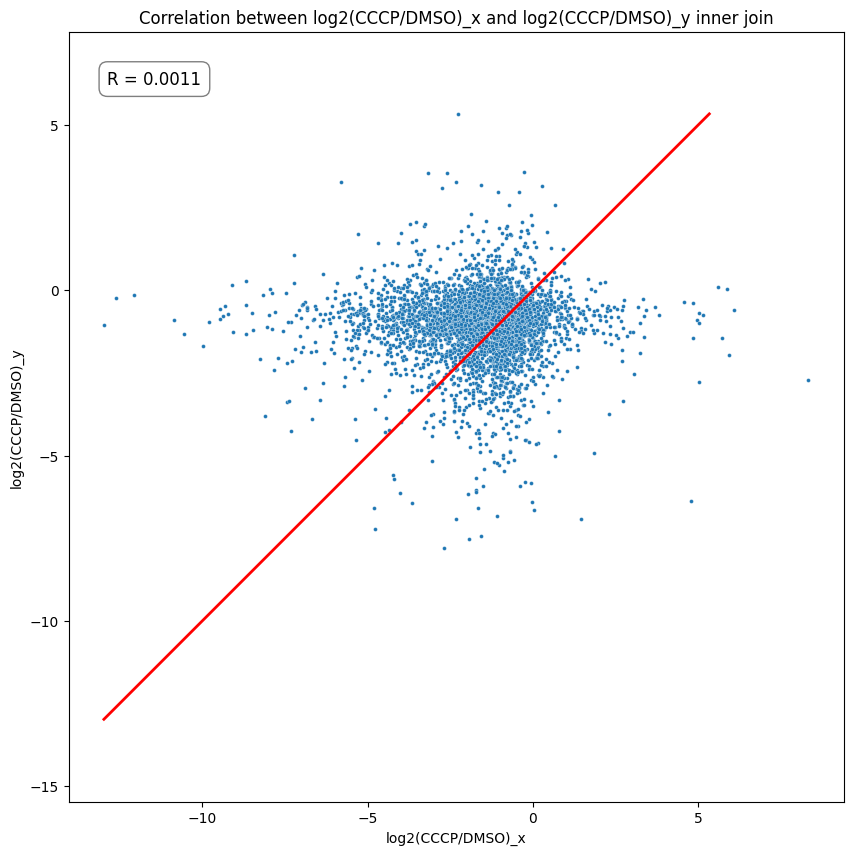

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Merge the datasets on the 'Accession' column using an outer join
colname_x = 'log2(CCCP/DMSO)'
colname_y = 'log2(CCCP/DMSO)'

if colname_x == colname_y:
    colname_x = str(colname_x)+'_x'
    colname_y = str(colname_y)+'_y'

# Perform the merge
merged_data_foldchange = pd.merge(data, 
                                  data_noIT, 
                                  left_index=True, 
                                  right_index=True, 
                                  how='inner')

# Select only the columns of interest
merged_data_foldchange = merged_data_foldchange[[colname_x, colname_y]]

# Now, let's find and remove rows with -inf and +inf values
df_filtered = merged_data_foldchange.replace([np.inf, -np.inf], np.nan).dropna()

# Define the data for the plot
x = df_filtered[colname_x]
y = df_filtered[colname_y]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# # Scatter plot
sns.scatterplot(x=x, y=y, ax=ax, s=8)
print([min(x), max(y)], [min(x), max(y)])

# 45-degree line
ax.plot([min(x), max(y)], [min(x), max(y)], color='red', linewidth=2)

# Calculate R and R^2
correlation_matrix = np.corrcoef(df_filtered[colname_x], df_filtered[colname_y])
r = correlation_matrix[0, 1]
r_squared = r**2

print(correlation_matrix)
print(r, r_squared)

# Display the counts, percentages, and R^2 on the plot
text_str = (
    f'R = {r:.4f}'
)
ax.text(0.05, 0.95, text_str, transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.5))
ax.set_xlabel(colname_x)
ax.set_ylabel(colname_y)
ax.set_title(f'Correlation between {colname_x} and {colname_y} inner join')

# Set axes to be equal, so the plot is square
ax.axis('equal')

# Save the figure BEFORE plt.show()
plt.savefig('correlation_IT_adj_vs_not_LMM_logchangesCCCPvsDMSO.png')

plt.show()

In [11]:
len(merged_data_foldchange)

4293

In [7]:
merged_data_foldchange = pd.merge(data, 
                                  data_noIT, 
                                  left_index=True, 
                                  right_index=True, 
                                  how='outer')

merged_data_foldchange.to_excel('data_dataNoIT.xlsx')

In [8]:
merged_data_foldchange = pd.merge(data, 
                                  data_noIT, 
                                  left_index=True, 
                                  right_index=True, 
                                  how='inner')

merged_data_foldchange.to_excel('data_dataNoIT_inner.xlsx')